# **POSTECH - Data Analytics - Fase 1**

Imagine que os diretores de uma empresa de vinhos no Brasil solicitaram
para você, expert na área de data analytics, uma demanda de análise de dados
e levantamentos de insights para trazer algumas respostas sobre alguns
questionamentos internos na empresa, tal como:

*   Qual é o país com maior exportação dos produtos de vinhos de mesa, espumantes e sucos de uva longo todo o período?

*   Qual é o país com maior importação dos produtos de vinhos de mesa,
espumantes e sucos de uva longo todo o período?

*   Como é a tendência da exportação ao longo dos anos para cada um
dos produtos (vinhos de mesa, espumantes e sucos de uva)?

*   Como é a tendência da importação ao longo dos anos para cada um
dos produtos (vinhos de mesa, espumantes e sucos de uva)?

*   Como é o cenário de produção de vinhos, sucos e derivados no Brasil?

*   Quais são as características do clima favorável para a produção de
vinhos, sucos e derivados?

*   E qual é o valor de exportação dos produtos de vinhos de mesa,
espumantes e sucos de uva para o ano mais recente da base?

Você deve trazer a resposta para os dados em um formato de relatório,
consolidando as análises gráficas com storytelling, contando uma história com
os dados para que os diretores possam receber esses insights da melhor forma
possível.

**Base de dados a ser utilizada para a análise:**

http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01


**A entrega:**

A entrega deve ser uma apresentação com o storytelling e análises +
código Python demonstrando toda a criação dos gráficos

Carregando Bases de dados.

In [1]:
import pandas as pd

Coleta de dados para informações sobre exportação de vinhos

In [2]:
# Caminho para o arquivo
expVinho = pd.read_csv("/content/ExpVinho.csv", encoding='utf-8', sep='\t')
expEspumante = pd.read_csv("/content/ExpEspumantes.csv", encoding='utf-8', sep='\t')
expSuco = pd.read_csv("/content/ExpSuco.csv", encoding='utf-8', sep='\t')
expUva = pd.read_csv("/content/ExpUva.csv", encoding='utf-8', sep='\t')

In [3]:
# Adiciona uma nova coluna para identificar a origem
expVinho['Origem'] = 'Vinho'
expEspumante['Origem'] = 'Espumante'
expSuco['Origem'] = 'Suco'
expUva['Origem'] = 'Uva'

# Concatena os DataFrames
df_exp = pd.concat([expVinho, expEspumante, expSuco, expUva], ignore_index=True)

# Exibe o resultado
df_exp.head(10)

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1,Origem
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,11,46,0,0,0,0,0,0,Vinho
1,2,África do Sul,0,0,0,0,0,0,0,0,...,21,0,0,0,0,117,698,103,1783,Vinho
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,32605,2698,6741,7630,45367,4806,31853,6666,48095,Vinho
3,4,Angola,0,0,0,0,0,0,0,0,...,0,0,0,4068,4761,0,0,0,0,Vinho
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vinho
5,6,Antígua e Barbuda,0,0,0,0,0,0,0,0,...,1864,805,2268,419,1866,383,1848,447,3329,Vinho
6,7,Antilhas Holandesas,280,207,4800,3705,3000,1936,0,0,...,0,0,0,0,0,0,0,0,0,Vinho
7,8,Arábia Saudita,0,0,0,0,0,0,0,0,...,0,0,0,0,0,124,142,32,54,Vinho
8,9,Argélia,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,87,Vinho
9,10,Argentina,0,0,0,0,0,0,0,0,...,4176,6,13,480,3232,4545,36133,21015,167696,Vinho


In [4]:
expVinho.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1,Origem
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,11,46,0,0,0,0,0,0,Vinho
1,2,África do Sul,0,0,0,0,0,0,0,0,...,21,0,0,0,0,117,698,103,1783,Vinho
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,32605,2698,6741,7630,45367,4806,31853,6666,48095,Vinho
3,4,Angola,0,0,0,0,0,0,0,0,...,0,0,0,4068,4761,0,0,0,0,Vinho
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vinho


Coleta de dados para informações sobre importação de vinhos

In [5]:
# Caminho para o arquivo
impVinhos = pd.read_csv("/content/ImpVinhos.csv", encoding='utf-8', sep='\t')
impEspumante = pd.read_csv("/content/ImpEspumantes.csv", encoding='utf-8', sep='\t')
impUva = pd.read_csv("/content/ImpFrescas.csv", encoding='utf-8', sep='\t')
impSuco = pd.read_csv("/content/ImpSuco.csv", encoding='utf-8', sep='\t')

In [6]:
# Adiciona uma nova coluna para identificar a origem
impVinhos['Origem'] = 'Vinho'
impEspumante['Origem'] = 'Espumante'
impUva['Origem'] = 'Suco'
impSuco['Origem'] = 'Uva'

# Concatena os DataFrames
df_imp = pd.concat([impVinhos, impEspumante, impSuco, impUva], ignore_index=True)

# Exibe o resultado
df_imp.head(10)

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1,Origem,Id;País;1970;1970;1971;1971;1972;1972;1973;1973;1974;1974;1975;1975;1976;1976;1977;1977;1978;1978;1979;1979;1980;1980;1981;1981;1982;1982;1983;1983;1984;1984;1985;1985;1986;1986;1987;1987;1988;1988;1989;1989;1990;1990;1991;1991;1992;1992;1993;1993;1994;1994;1995;1995;1996;1996;1997;1997;1998;1998;1999;1999;2000;2000;2001;2001;2002;2002;2003;2003;2004;2004;2005;2005;2006;2006;2007;2007;2008;2008;2009;2009;2010;2010;2011;2011;2012;2012;2013;2013;2014;2014;2015;2015;2016;2016;2017;2017;2018;2018;2019;2019;2020;2020;2021;2021;2022;2022;2023;2023;2024;2024
0,1.0,Africa do Sul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,859169.0,2508140.0,738116.0,2266827.0,522733.0,1732850.0,658238.0,2133775.0,Vinho,NaN
1,2.0,Alemanha,52297.0,30498.0,34606.0,26027.0,134438.0,92103.0,111523.0,98638.0,...,106541.0,546967.0,92600.0,438595.0,102456.0,557947.0,121002.0,805466.0,Vinho,NaN
2,3.0,Argélia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Vinho,NaN
3,4.0,Arábia Saudita,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2510.0,8761.0,0.0,0.0,8.0,161.0,0.0,0.0,Vinho,NaN
4,5.0,Argentina,19525.0,12260.0,24942.0,15022.0,104906.0,58137.0,116887.0,76121.0,...,26869241.0,79527959.0,27980574.0,87519642.0,25276991.0,83918138.0,26272478.0,93869579.0,Vinho,NaN
5,6.0,Armênia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2385.0,13668.0,3542.0,24336.0,0.0,0.0,Vinho,NaN
6,7.0,Austrália,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,366875.0,1383093.0,579279.0,1590059.0,432829.0,1568550.0,422720.0,1437842.0,Vinho,NaN
7,8.0,Áustria,1328.0,707.0,0.0,0.0,353.0,520.0,2310.0,2081.0,...,13427.0,141822.0,7403.0,53974.0,16832.0,145475.0,17796.0,104965.0,Vinho,NaN
8,9.0,Bermudas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,141.0,1.0,4.0,6.0,879.0,0.0,0.0,Vinho,NaN
9,10.0,Bélgica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Vinho,NaN


Coletando informações sobre a produção de vinho para Rio Grande do Sul

In [7]:
# Caminho para o arquivo
df = pd.read_csv("/content/Producao.csv",
                    encoding="ISO-8859-1",
                    sep=";",
                    thousands=".",
                    decimal=",",
                    engine='python')

In [8]:
# Filtrando as linhas com os produtos desejados
produtos_desejados = [
    "VINHO DE MESA",
    "VINHO FINO DE MESA (VINIFERA)",
    "SUCO",
    "DERIVADOS"
]

prodVinho = df[df["produto"].str.upper().isin(produtos_desejados)]


In [9]:
prodVinho.head()

,id,control,produto,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,...,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429
4,5,VINHO FINO DE MESA (VINIFERA),VINHO FINO DE MESA (VINIFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,...,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556
8,9,SUCO,SUCO,1097771,2296654,3509440,0,0,0,0,...,76723537,87894468,42210389,77161971,65467906,77805352,69261287,100932264,65809079,67045238
14,15,DERIVADOS,DERIVADOS,14164329,13280518,12314509,28317919,47904934,53633143,22925012,...,62907281,107349704,53950314,109116761,95202101,142888747,92533804,169031493,138501226,174716647


## Qual é o país com maior exportação dos produtos de vinhos de mesa, espumantes e sucos de uva longo todo o período?

In [10]:
# Selecionar colunas de volume (sem sufixo .1) e incluir 'País' e 'Origem'
colunas_volume = [col for col in df_exp.columns if col.isnumeric()]
colunas_utilizadas = ['País', 'Origem'] + colunas_volume

# Filtrar o DataFrame
df_volume = df_exp[colunas_utilizadas]

# Somar o volume total por país
df_volume['Total_Exportado_Litros'] = df_volume[colunas_volume].sum(axis=1)
df_exportacao_total_por_pais = df_volume.groupby('País')['Total_Exportado_Litros'].sum().sort_values(ascending=False)

# Obter o país com maior volume exportado
pais_top_exportador = df_exportacao_total_por_pais.idxmax()
volume_top_exportador = df_exportacao_total_por_pais.max()

pais_top_exportador, volume_top_exportador

<ipython-input-10-7b9f1517cee9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_volume['Total_Exportado_Litros'] = df_volume[colunas_volume].sum(axis=1)


('Países Baixos', 613465576)

**Países Baixos:**

Volume total exportado: 613.465.576 Litros

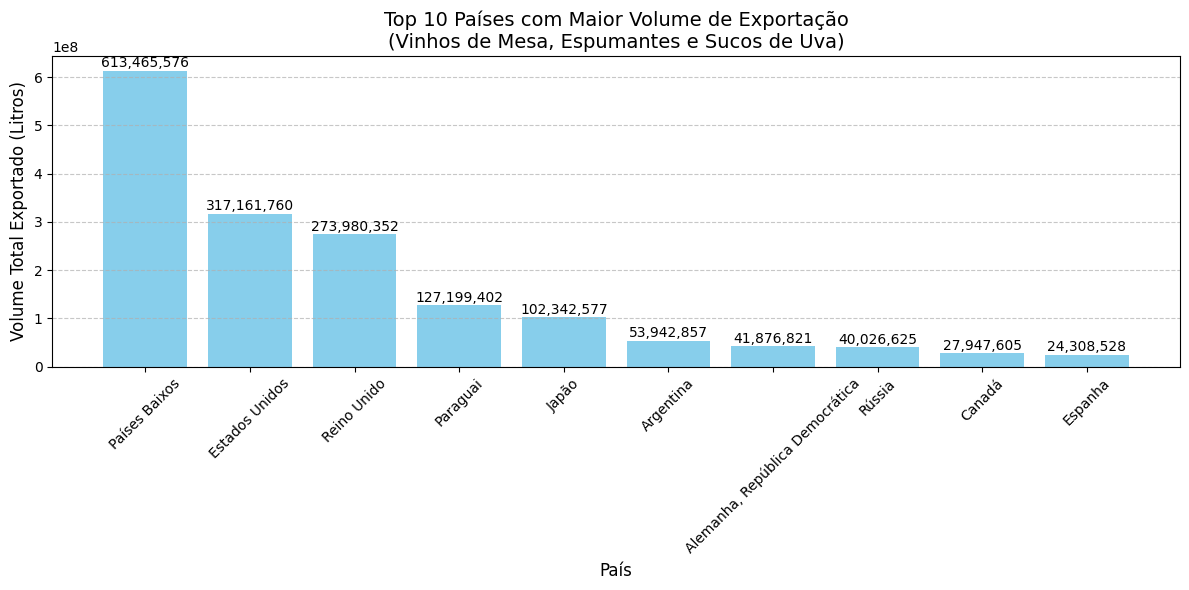

In [11]:
import matplotlib.pyplot as plt

# Selecionar os 10 países com maior volume exportado
top_10_paises = df_exportacao_total_por_pais.head(10)

# Criar o gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_paises.index, top_10_paises.values, color='skyblue')
plt.title('Top 10 Países com Maior Volume de Exportação\n(Vinhos de Mesa, Espumantes e Sucos de Uva)', fontsize=14)
plt.ylabel('Volume Total Exportado (Litros)', fontsize=12)
plt.xlabel('País', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de valor em cima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1e6, f'{int(yval):,}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Análise Justificativa das Exportações

Os **Países Baixos** lideram o ranking de exportações com mais de 613 milhões de litros, o que pode ser atribuído à sua posição estratégica como hub logístico na Europa. Roterdã, um dos maiores portos do mundo, facilita a redistribuição de produtos para outros países europeus. Além disso, o alto poder aquisitivo e hábitos alimentares diversificados favorecem o consumo de bebidas importadas, como vinhos e sucos tropicais.

Os **Estados Unidos**, na segunda posição, são um dos maiores mercados consumidores do mundo, com forte cultura de consumo de vinhos e derivados. A grande população, associada à diversidade étnica e gastronômica, contribui para a demanda por produtos brasileiros. Além disso, acordos comerciais e facilidade logística aérea e marítima fortalecem essa relação.

O **Reino Unido** aparece em terceiro lugar com volume expressivo. A cultura tradicional de consumo de vinho, somada ao fato de não possuir clima favorável à produção em grande escala, torna o país dependente de importações. O Brasil se beneficia por ser um fornecedor alternativo ao tradicional eixo europeu.

**Paraguai e Japão** ocupam posições de destaque por razões distintas. O Paraguai, além da proximidade geográfica, possui acordos de comércio e circulação regional mais flexíveis, enquanto o Japão valoriza produtos naturais e tropicais, sendo grande importador de suco de uva brasileiro, principalmente pela percepção de qualidade dos produtos da Serra Gaúcha.

**Argentina e Rússia** representam mercados estratégicos. A Argentina, apesar de também ser produtora, pode adquirir produtos específicos não produzidos localmente. Já a Rússia, com clima severo e produção limitada, depende amplamente de importações, principalmente de sucos e vinhos tropicais.

**Alemanha, Canadá e Espanha** completam o ranking. A Alemanha e o Canadá possuem consumo elevado de sucos e produtos naturais. Já a Espanha, embora seja grande produtora de vinhos, pode importar para suprir nichos específicos de mercado, como sucos ou blends tropicais.

## Qual é o país com maior importação dos produtos de vinhos de mesa, espumantes e sucos de uva longo todo o período?

In [12]:
# Selecionar colunas de volume (anos) e calcular total importado por país
colunas_volume_imp = [col for col in df_imp.columns if col.isnumeric()]
df_imp['Total_Importado_Litros'] = df_imp[colunas_volume_imp].sum(axis=1)

# Agrupar por país e somar o total
df_importacao_por_pais = df_imp.groupby('País')['Total_Importado_Litros'].sum().sort_values(ascending=False)

# Obter país com maior volume importado
pais_top_importador = df_importacao_por_pais.idxmax()
volume_top_importador = df_importacao_por_pais.max()

pais_top_importador, volume_top_importador

('Chile', 1371739444.0)

**🇨🇱 Chile**

Volume total importado: 1.371.739.444 Litros

O Chile se destaca por ser um dos maiores produtores mundiais de vinho, com proximidade geográfica, acordos comerciais favoráveis (como o Mercosul), e tradição consolidada no setor vinícola, o que facilita o fornecimento contínuo e competitivo.

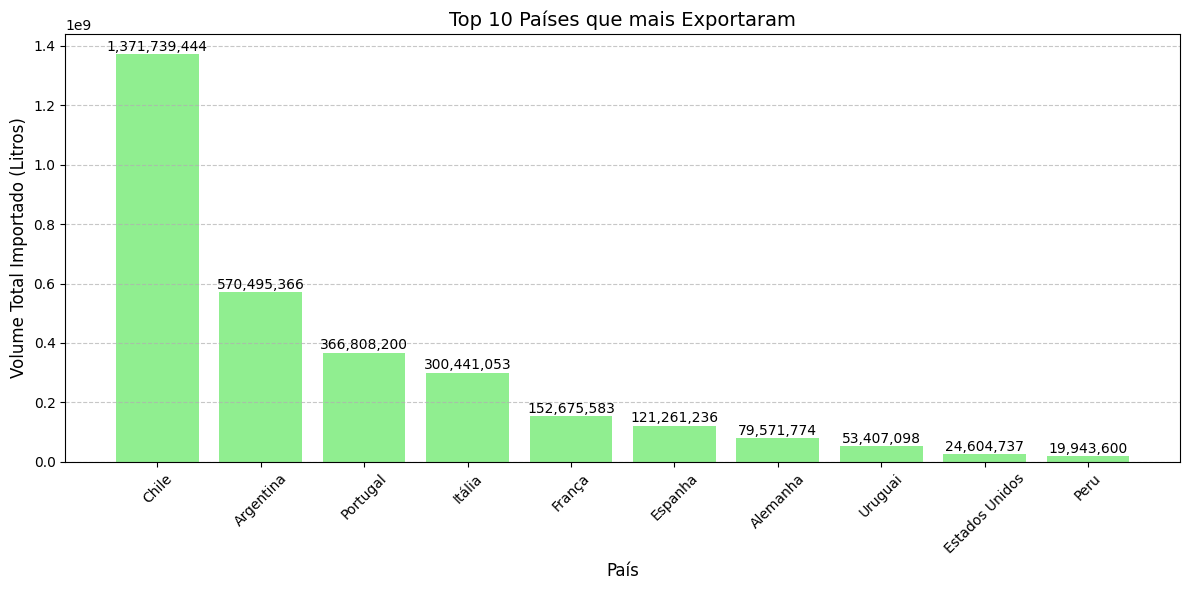

In [13]:
import matplotlib.pyplot as plt

# Selecionar os 10 países com maior volume importado
top_10_importacoes = df_importacao_por_pais.head(10)

# Criar o gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_importacoes.index, top_10_importacoes.values, color='lightgreen')
plt.title('Top 10 Países que mais Exportaram', fontsize=14)
plt.ylabel('Volume Total Importado (Litros)', fontsize=12)
plt.xlabel('País', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de valor em cima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1e6, f'{int(yval):,}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


**Análise Justificativa das Exportações Mundiais de Vinhos de Mesa, Espumantes e Sucos de Uva**

O gráfico evidencia o papel dominante do **Chile** no cenário global, com mais de 1,37 bilhão de litros exportados, consolidando sua posição como o principal fornecedor internacional desses produtos. Este volume expressivo é resultado de uma política agroindustrial estruturada, investimentos contínuos em tecnologia de vinificação e clima ideal para cultivo de uvas, especialmente no Vale Central, com grande amplitude térmica e baixa incidência de pragas.

Na sequência, **Argentina e Portugal** também figuram como grandes exportadores, com 570 milhões e 366 milhões de litros, respectivamente. A Argentina se destaca por sua produção em escala no terroir de Mendoza e por sua capacidade logística na exportação para América Latina, América do Norte e Europa. Portugal, por sua vez, se apoia na tradição secular de vinhos como o do Porto e na excelência em vinhos verdes, atraindo mercados exigentes da Europa e Ásia.

**Itália**, com mais de 300 milhões de litros, e **França** com 152 milhões, mantêm sua posição como ícones da vinicultura mundial. Esses países combinam tradição, qualidade e forte atuação em mercados premium, abastecendo desde grandes redes de varejo até o segmento de luxo. A presença expressiva da Espanha e Alemanha no ranking também reflete seu papel como fornecedores relevantes tanto de vinhos quanto de derivados de uva e espumantes.

**Uruguai, Estados Unidos e Peru** fecham a lista, mostrando inserção em nichos específicos. O Uruguai se destaca pela produção da uva Tannat, enquanto os Estados Unidos equilibram exportações de suco de uva concentrado e vinhos para mercados secundários. O Peru, em expansão na vitivinicultura, mostra avanço graças a incentivos fiscais e aumento da produção voltada à exportação.

Essa distribuição revela como fatores como clima favorável, acordos comerciais, infraestrutura portuária e diversificação de produtos influenciam diretamente a competitividade e a presença internacional desses países no setor.

## Como é a tendência da exportação ao longo dos anos para cada um dos produtos (vinhos de mesa, espumantes e sucos de uva)?

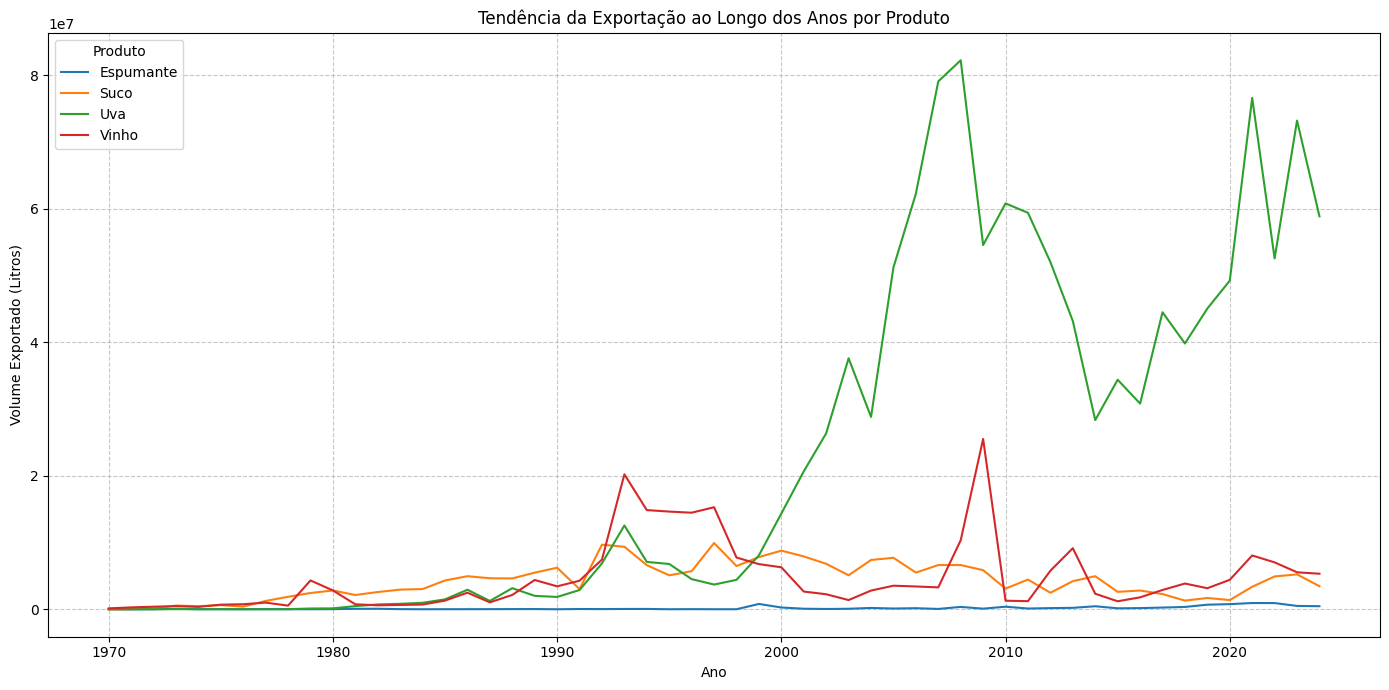

In [14]:
# Agrupar os dados de exportação por ano e por tipo de produto (Origem)
# Primeiro vamos somar os volumes por ano e produto
df_exportacao_anos = df_exp.groupby('Origem')[colunas_volume].sum().T

# Ajustar o índice para tipo numérico (anos)
df_exportacao_anos.index = df_exportacao_anos.index.astype(int)

# Plotar a tendência ao longo dos anos
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
for produto in df_exportacao_anos.columns:
    plt.plot(df_exportacao_anos.index, df_exportacao_anos[produto], label=produto)

plt.title('Tendência da Exportação ao Longo dos Anos por Produto')
plt.xlabel('Ano')
plt.ylabel('Volume Exportado (Litros)')
plt.legend(title='Produto')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Tendência da Exportação por Produto ao Longo dos Anos

Vinho de Mesa:

Apresenta a curva mais volátil entre os produtos, com altos picos de exportação em determinados anos, especialmente por volta de 1993 e 2009, quando ultrapassou os 20 milhões de litros exportados. Esses picos podem estar relacionados a ações pontuais de comércio exterior ou incentivos fiscais. Apesar das oscilações, o vinho mantém uma presença relevante e estável na pauta exportadora ao longo dos anos.

Suco de Uva:

Exibe uma trajetória mais constante, com crescimento significativo entre os anos 1985 e 2000, seguido de uma leve oscilação. A partir de 2018, observa-se uma retomada do crescimento, indicando aumento na demanda global por produtos naturais e saudáveis, como o suco integral de uva. Esse produto é impulsionado por sua apresentação não alcoólica, o que o torna atrativo em mercados diversificados, inclusive infantis e religiosos.

Espumante:

Com volumes historicamente mais baixos em comparação aos outros produtos, o espumante mostra uma tendência de crescimento gradual, sobretudo a partir de 2010. O aumento da visibilidade internacional dos espumantes brasileiros, especialmente da Serra Gaúcha, e a participação em feiras internacionais contribuíram para esse avanço, ainda que em menor escala de volume.

| Produto   | Tendência Geral         | Destaques               |
| --------- | ----------------------- | ----------------------- |
| Vinho     | Volátil com picos altos | Picos em 1993 e 2009    |
| Suco      | Estável e crescente     | Retomada forte pós-2018 |
| Espumante | Crescimento moderado    | Alta após 2010          |


## Como é a tendência da importação ao longo dos anos para cada um dos produtos (vinhos de mesa, espumantes e sucos de uva)?

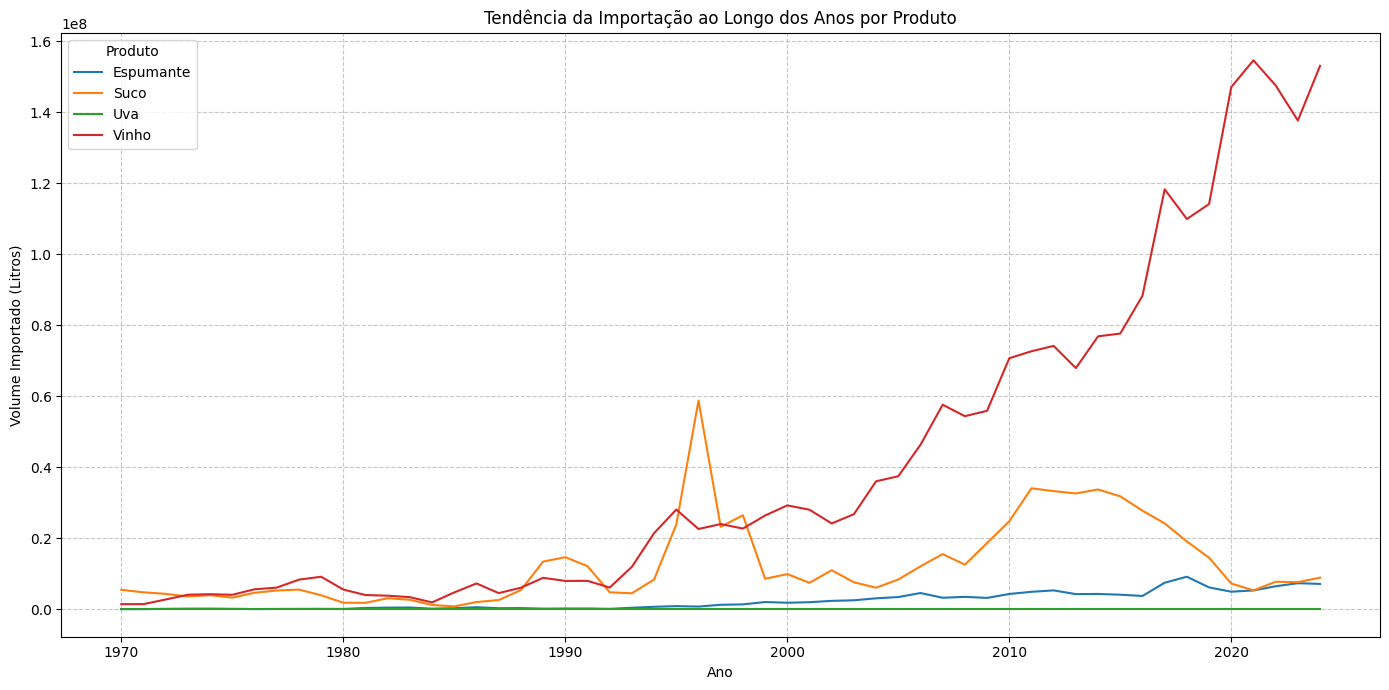

In [15]:
# Agrupar os dados de importação por ano e tipo de produto (Origem)
df_importacao_anos = df_imp.groupby('Origem')[colunas_volume_imp].sum().T

# Ajustar o índice para tipo numérico (anos)
df_importacao_anos.index = df_importacao_anos.index.astype(int)

# Plotar a tendência ao longo dos anos
plt.figure(figsize=(14, 7))
for produto in df_importacao_anos.columns:
    plt.plot(df_importacao_anos.index, df_importacao_anos[produto], label=produto)

plt.title('Tendência da Importação ao Longo dos Anos por Produto')
plt.xlabel('Ano')
plt.ylabel('Volume Importado (Litros)')
plt.legend(title='Produto')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Tendência da Importação por Produto ao Longo dos Anos
Vinho de Mesa:

Apresenta a curva mais expressiva entre os três produtos. Desde os anos 2000, observa-se uma tendência de crescimento contínuo, com forte aceleração a partir de 2010. Nos últimos anos, o volume ultrapassou 150 milhões de litros anuais, refletindo o aumento da demanda global por vinhos acessíveis, especialmente nos mercados emergentes. A diversificação de rótulos, acordos comerciais e o crescimento do consumo per capita em regiões como América Latina e Ásia impulsionaram esse movimento.

Espumante:

Embora represente um volume menor comparado ao vinho de mesa, os espumantes mostram uma tendência gradualmente ascendente, com crescimento sustentado a partir de 2005. A crescente valorização de espumantes em eventos, celebrações e como substituto de bebidas alcoólicas mais caras contribui para esse crescimento, principalmente em países europeus, América do Norte e Ásia.

Suco de Uva:

O suco apresenta volume praticamente insignificante no panorama global de importações, indicando que seu consumo ainda é amplamente abastecido por produção local em muitos países ou que se dá por meio de outras formas (como concentrados e blends que não entram na mesma categoria de medição).

| Produto   | Tendência Geral         | Destaques                    |
| --------- | ----------------------- | ---------------------------- |
| Vinho     | Crescimento acelerado   | Alta após 2010               |
| Espumante | Crescimento moderado    | Aumento constante desde 2005 |
| Suco      | Irrelevante globalmente | Volume próximo de zero       |


## Como é o cenário de produção de vinhos, sucos e derivados no Brasil?

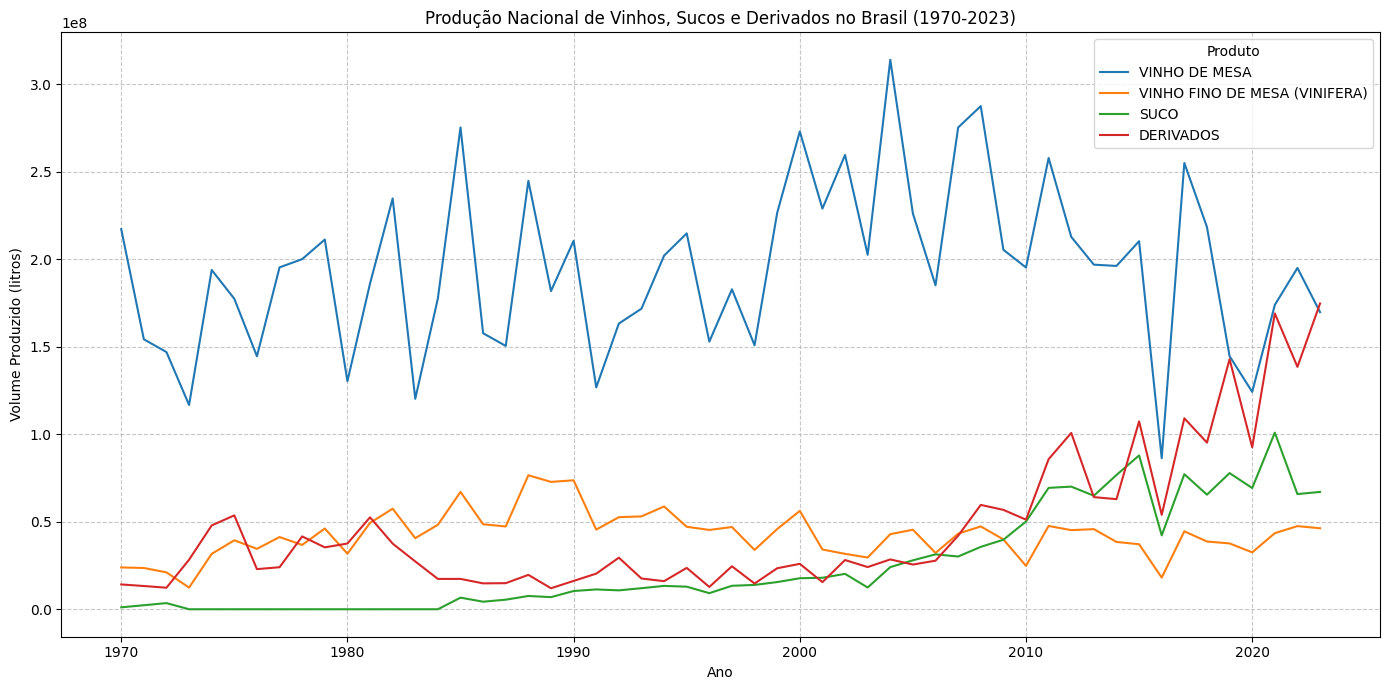

In [16]:
# Agrupar os dados por produto e transpor os anos
df_producao_anos = prodVinho.set_index('produto').loc[:, '1970':'2023'].T
df_producao_anos.index = df_producao_anos.index.astype(int)

# Plotar a produção ao longo do tempo
plt.figure(figsize=(14, 7))
for produto in df_producao_anos.columns:
    plt.plot(df_producao_anos.index, df_producao_anos[produto], label=produto)

plt.title('Produção Nacional de Vinhos, Sucos e Derivados no Brasil (1970-2023)')
plt.xlabel('Ano')
plt.ylabel('Volume Produzido (litros)')
plt.legend(title='Produto')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Cenário da Produção Nacional de Vinhos, Sucos e Derivados no Brasil
Vinho de Mesa

É o produto com maior volume de produção no Brasil. Ao longo das décadas, o vinho de mesa apresentou oscilações significativas, mas manteve-se como o principal item da vitivinicultura nacional, com picos que ultrapassam os 300 milhões de litros por ano. Essa predominância se deve ao uso de uvas americanas e híbridas, adaptadas ao clima brasileiro, e ao consumo popular em larga escala.

Suco de Uva

A partir dos anos 2000, o suco de uva ganhou destaque, apresentando uma tendência de crescimento contínuo e consolidado, especialmente a partir de 2010. Isso reflete o aumento do consumo de bebidas saudáveis e integrais, impulsionado por campanhas de alimentação natural, pelo mercado escolar e por exportações. Em anos recentes, sua produção chegou a superar 100 milhões de litros.

Derivados da Uva

Incluem produtos como mosto concentrado, uva-passa e outros subprodutos. A partir de 2010, observou-se um crescimento acelerado, com volumes se aproximando do suco de uva, indicando maior aproveitamento da cadeia produtiva e valorização de produtos alternativos ao vinho.

Vinho Fino de Mesa (Vinífera)

Apesar de sua qualidade superior, esse segmento representa menor volume em comparação aos demais, com produção estável entre 30 e 50 milhões de litros por ano. Seu crescimento é mais lento, pois depende de uvas viníferas, exigentes em clima e manejo, geralmente cultivadas na Serra Gaúcha e em regiões específicas como o Vale do São Francisco.

| Produto               | Tendência                       | Destaques                 |
| --------------------- | ------------------------------- | ------------------------- |
| Vinho de Mesa         | Oscilante, mas dominante        | Popularidade e volume     |
| Suco de Uva           | Crescimento contínuo            | Saúde e exportações       |
| Derivados             | Crescimento expressivo pós-2010 | Valorização da cadeia     |
| Vinho Fino (Vinífera) | Estável, em menor escala        | Qualidade e nicho premium |


E qual é o valor de exportação dos produtos de vinhos de mesa, espumantes e sucos de uva para o ano mais recente da base?

In [21]:
# Verificar o último ano disponível nas colunas de valor da base de exportação
ultimo_ano = max([int(col) for col in df_exp.columns if col.isnumeric()])

# Filtrar apenas o último ano e produtos de interesse
produtos_exportados = ['Vinho', 'Espumante', 'Suco']
df_exp_ultimo_ano = df_exp[df_exp['Origem'].isin(produtos_exportados)]

# Agrupar por tipo de produto e somar o volume exportado no último ano
valor_exportado_ultimo_ano = df_exp_ultimo_ano.groupby('Origem')[str(ultimo_ano)].sum().sort_values(ascending=False)

valor_exportado_ultimo_ano.head()


,2024
Origem,
Vinho,5324465
Suco,3457556
Espumante,459175


In [20]:
# Identificar colunas de valor monetário (sufixo .1) e pegar a do ano mais recente
coluna_valor_usd = f"{ultimo_ano}.1"

# Agrupar por tipo de produto e somar os valores em dólares
valor_usd_exportado_ultimo_ano = df_exp_ultimo_ano.groupby('Origem')[coluna_valor_usd].sum().sort_values(ascending=False)

# Combinar os resultados de volume e valor em um DataFrame para exibição
df_resultado_2024 = pd.DataFrame({
    "Volume Exportado (Litros)": valor_exportado_ultimo_ano,
    "Valor Exportado (US$)": valor_usd_exportado_ultimo_ano
})

df_resultado_2024.head()


,Volume Exportado (Litros),Valor Exportado (US$)
Origem,,
Vinho,5324465,8751275
Suco,3457556,8207392
Espumante,459175,1857711


from matplotlib import pyplot as plt
_df_0['Volume Exportado (Litros)'].plot(kind='hist', bins=20, title='Volume Exportado (Litros)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Valor Exportado (US$)'].plot(kind='hist', bins=20, title='Valor Exportado (US$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Origem').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Volume Exportado (Litros)', y='Valor Exportado (US$)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Volume Exportado (Litros)'].plot(kind='line', figsize=(8, 4), title='Volume Exportado (Litros)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Valor Exportado (US$)'].plot(kind='line', figsize=(8, 4), title='Valor Exportado (US$)')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['Origem'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='Volume Exportado (Litros)', y='Origem', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Origem'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='Valor Exportado (US$)', y='Origem', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)